# Flower Recognition Dataset

## 1. Check data accessablity

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [70]:
import os
import random
import matplotlib.pyplot as plt
import tqdm.notebook.tqdm as tqdm
from PIL import Image
from matplotlib.image import imread
from torchvision.utils import make_grid
root='/content/drive/My Drive/Colab Notebooks/Data/flowers/flowers/'

In [49]:
def show_example_images(dir):
    random.seed(1)
    list_ = os.listdir(dir)
    plt.figure()
    plt.figure(figsize=(20,15))
    for i in range(0, len(list_)):
        path = os.path.join(dir, list_[i])
        flower_list = os.listdir(path)
        img = random.sample(flower_list,1)
        img = imread(os.path.join(path,img[0]))

        ax = plt.subplot(1,len(list_),i+1)
        plt.imshow(img)

        # remove axis
        plt.xticks([])
        plt.yticks([])

        # remove black frames
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()
    return list_

<Figure size 432x288 with 0 Axes>

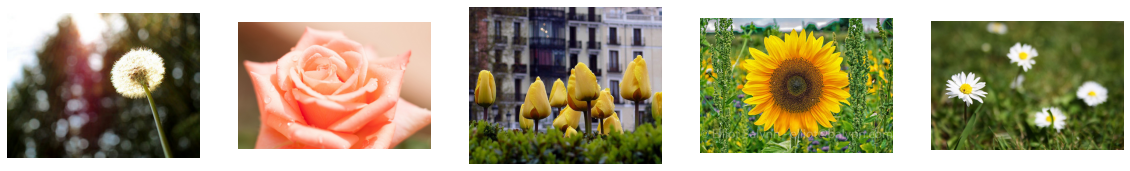

['dandelion', 'rose', 'tulip', 'sunflower', 'daisy']

In [50]:
label = show_example_images(root)
label

## 2. Check the number of images contained in each category

In [71]:
def count_and_check_imgs(root):
  labels = os.listdir(root)
  deg_imgs = []
  count = dict.fromkeys(labels,0)
  for label in labels:
    for f in tqdm(os.listdir(os.path.join(root,label))):
      path = os.path.join(root,label,f)
      try:
        Image.open(path).load()
        count[label]+=1
      except Exception as e:
        deg_imgs.append(path)
        pass

  # print degenerated images
  print('The are {} degenerated images,they are:\n'.format(len(deg_imgs)))
  for f in deg_imgs:
    print(f)
  return count

In [72]:
%%time
print(count_and_check_imgs(root))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



The are 3 degenerated images,they are:

/content/drive/My Drive/Colab Notebooks/Data/flowers/flowers/dandelion/flickr.py
/content/drive/My Drive/Colab Notebooks/Data/flowers/flowers/dandelion/flickr.pyc
/content/drive/My Drive/Colab Notebooks/Data/flowers/flowers/dandelion/run_me.py
{'dandelion': 1052, 'rose': 784, 'tulip': 984, 'sunflower': 734, 'daisy': 769}
CPU times: user 18.5 s, sys: 1.97 s, total: 20.4 s
Wall time: 23min 8s
